In [3]:
import pandas as pd
df=pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
df.shape

(350, 11)

In [5]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [7]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [10]:
df['Gender'].unique()
df['City'].unique()
df['Membership Type'].unique()
df['Satisfaction Level'].unique()

array(['Satisfied', 'Neutral', 'Unsatisfied', nan], dtype=object)

In [13]:
df['Gender'] = df['Gender'].astype('category')
df['Membership Type'] = df['Membership Type'].astype('category')
df['Satisfaction Level'] = df['Satisfaction Level'].astype('category')

In [15]:
df['Spend per Item']=df['Total Spend'] / df['Items Purchased']

In [17]:
def purchase_frequency(days):
    if days < 15:
        return 'Frequent'
    elif days <= 30:
        return 'Occasional'
    else:
        return 'Rare'

df['Purchase_Frequency'] = df['Days Since Last Purchase'].apply(purchase_frequency)

In [18]:
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer ID               350 non-null    int64   
 1   Gender                    350 non-null    category
 2   Age                       350 non-null    int64   
 3   City                      350 non-null    object  
 4   Membership Type           350 non-null    category
 5   Total Spend               350 non-null    float64 
 6   Items Purchased           350 non-null    int64   
 7   Average Rating            350 non-null    float64 
 8   Discount Applied          350 non-null    bool    
 9   Days Since Last Purchase  350 non-null    int64   
 10  Satisfaction Level        348 non-null    category
 11  Membership                350 non-null    category
 12  Spend per Item            350 non-null    float64 
 13  Purchase_Frequency        350 non-null    object  

In [25]:
df['Satisfaction Level'].unique()

['Satisfied', 'Neutral', 'Unsatisfied']
Categories (3, object): ['Neutral', 'Satisfied', 'Unsatisfied']

In [28]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level', 'Membership',
       'Spend per Item', 'Purchase_Frequency'],
      dtype='object')

In [29]:
satisfaction_map = {
    'Unsatisfied': 1,
    'Neutral': 2,
    'Satisfied': 3
}

df['Satisfaction Level Numeric'] = df['Satisfaction Level'].map(satisfaction_map)

In [30]:
df[['Satisfaction Level', 'Satisfaction Level Numeric']].head(10)

,Satisfaction Level,Satisfaction Level Numeric
0,3,NaN
1,2,NaN
2,1,NaN
3,3,NaN
4,1,NaN
5,2,NaN
6,3,NaN
7,2,NaN
8,1,NaN
9,3,NaN


In [32]:
df['Satisfaction Level Numeric'].fillna(df['Satisfaction Level Numeric'].mean())

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
345   NaN
346   NaN
347   NaN
348   NaN
349   NaN
Name: Satisfaction Level Numeric, Length: 348, dtype: float64

In [33]:
df['Satisfaction Level'].unique()
df['Satisfaction Level'].dtype

CategoricalDtype(categories=[2, 3, 1], ordered=False, categories_dtype=int64)

In [34]:
df['Satisfaction Level Numeric'].isnull().sum()

np.int64(348)

In [35]:
df['Satisfaction Level Numeric'] = df['Satisfaction Level'].astype('int64')

In [36]:
df['Satisfaction Level Numeric'].isnull().sum()

np.int64(0)

In [37]:
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 349
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Customer ID                 348 non-null    int64   
 1   Gender                      348 non-null    category
 2   Age                         348 non-null    int64   
 3   City                        348 non-null    object  
 4   Membership Type             348 non-null    category
 5   Total Spend                 348 non-null    float64 
 6   Items Purchased             348 non-null    int64   
 7   Average Rating              348 non-null    float64 
 8   Discount Applied            348 non-null    bool    
 9   Days Since Last Purchase    348 non-null    int64   
 10  Satisfaction Level          348 non-null    category
 11  Membership                  348 non-null    category
 12  Spend per Item              348 non-null    float64 
 13  Purchase_Frequency       

In [38]:
df.isnull().sum()

Customer ID                   0
Gender                        0
Age                           0
City                          0
Membership Type               0
Total Spend                   0
Items Purchased               0
Average Rating                0
Discount Applied              0
Days Since Last Purchase      0
Satisfaction Level            0
Membership                    0
Spend per Item                0
Purchase_Frequency            0
Satisfaction Level Numeric    0
dtype: int64

In [39]:
df.dtypes

Customer ID                      int64
Gender                        category
Age                              int64
City                            object
Membership Type               category
Total Spend                    float64
Items Purchased                  int64
Average Rating                 float64
Discount Applied                  bool
Days Since Last Purchase         int64
Satisfaction Level            category
Membership                    category
Spend per Item                 float64
Purchase_Frequency              object
Satisfaction Level Numeric       int64
dtype: object

In [40]:
df['Gender'].value_counts()
df['City'].value_counts()
df['Membership Type'].value_counts()

Membership Type
Gold      117
Silver    117
Bronze    114
Name: count, dtype: int64

In [41]:
df['Gender'] = df['Gender'].str.capitalize()

In [42]:
df['Spend per Item'] = df['Total Spend'] / df['Items Purchased']

In [43]:
df['High_Spender'] = df['Total Spend'] > df['Total Spend'].mean()

In [45]:
df.head() # Preview first few rows
df.describe() # Summary stats
df.dtypes # Data types

Customer ID                      int64
Gender                          object
Age                              int64
City                            object
Membership Type               category
Total Spend                    float64
Items Purchased                  int64
Average Rating                 float64
Discount Applied                  bool
Days Since Last Purchase         int64
Satisfaction Level            category
Membership                    category
Spend per Item                 float64
Purchase_Frequency              object
Satisfaction Level Numeric       int64
High_Spender                      bool
dtype: object

In [62]:
!pip install sqlalchemy

In [63]:
from sqlalchemy import create_engine
engine=create_engine('sqlite:///ecommerce.db')

In [64]:
df.to_sql('ecommerce_customers', engine, index=False, if_exists='replace')

348

In [65]:
pd.read_sql('SELECT * FROM ecommerce_customers', engine)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Spend per Item,Purchase_Frequency,Satisfaction Level Numeric,High_Spender
0,101,Female,29,New York,Gold,1120.20,14,4.6,1,25,3,80.014286,Occasional,3,1
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,0,18,2,70.954545,Occasional,2,0
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,1,42,1,56.750000,Rare,1,0
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,0,12,3,77.910526,Frequent,3,1
4,105,Male,27,Miami,Silver,720.40,13,4.0,1,55,1,55.415385,Rare,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,446,Male,32,Miami,Silver,660.30,10,3.8,1,42,1,66.030000,Rare,1,0
344,447,Female,36,Houston,Bronze,470.50,8,3.0,0,27,2,58.812500,Occasional,2,0
345,448,Female,30,New York,Gold,1190.80,16,4.5,1,28,3,74.425000,Occasional,3,1
346,449,Male,34,Los Angeles,Silver,780.20,11,4.2,0,21,2,70.927273,Occasional,2,0


In [74]:
#Total number of customers
query="SELECT COUNT(*) FROM ecommerce_customers"
pd.read_sql(query,engine)

,COUNT(*)
0,348


In [76]:
#Summary statistics(average,min,max)
query="SELECT AVG(\"Total Spend\"), MIN(\"Total Spend\"), MAX(\"Total Spend\")FROM ecommerce_customers"
pd.read_sql(query, engine)

,"AVG(""Total Spend"")","MIN(""Total Spend"")","MAX(""Total Spend"")"
0,847.793103,410.8,1520.1


In [79]:
#Find unique values for categorial columns
query = "SELECT DISTINCT \"Membership Type\" FROM ecommerce_customers"
pd.read_sql(query, engine)

,Membership Type
0,Gold
1,Silver
2,Bronze


In [80]:
#Find unique values for categorial columns
query = "SELECT DISTINCT \"City\" FROM ecommerce_customers"
pd.read_sql(query, engine)

,City
0,New York
1,Los Angeles
2,Chicago
3,San Francisco
4,Miami
5,Houston


In [81]:
#Who are the highest-spending customers?
query = "SELECT \"Customer ID\", \"Total Spend\" FROM ecommerce_customers ORDER BY \"Total Spend\" DESC LIMIT 10"
pd.read_sql(query, engine)

,Customer ID,Total Spend
0,110,1520.1
1,128,1500.1
2,158,1500.1
3,188,1500.1
4,218,1500.1
5,260,1500.1
6,290,1500.1
7,331,1500.1
8,146,1490.1
9,176,1490.1


In [82]:
#What is the average satisfaction level for each city?
query = "SELECT \"City\", AVG(\"Satisfaction Level\") FROM ecommerce_customers GROUP BY \"City\""
pd.read_sql(query, engine)

,City,"AVG(""Satisfaction Level"")"
0,Chicago,1.000000
1,Houston,2.000000
2,Los Angeles,2.135593
3,Miami,1.000000
4,New York,3.000000
5,San Francisco,3.000000


In [83]:
#What is the distribution of membership types?
query = "SELECT \"Membership Type\", COUNT(*) FROM ecommerce_customers GROUP BY \"Membership Type\""
pd.read_sql(query, engine)

,Membership Type,COUNT(*)
0,Bronze,114
1,Gold,117
2,Silver,117


In [84]:
#What is the average spend per item for each gender?
query = "SELECT \"Gender\", AVG(\"Spend per Item\") FROM ecommerce_customers GROUP BY \"Gender\""
pd.read_sql(query, engine)

,Gender,"AVG(""Spend per Item"")"
0,Female,62.941410
1,Male,67.540652


In [85]:
#Analyze the relationship between membership type and total spend
query = "SELECT \"Membership Type\", AVG(\"Total Spend\") FROM ecommerce_customers GROUP BY \"Membership Type\" ORDER BY AVG(\"Total Spend\") DESC"
pd.read_sql(query, engine)

,Membership Type,"AVG(""Total Spend"")"
0,Gold,1311.144444
1,Silver,748.432479
2,Bronze,474.223684


<Axes: xlabel='Satisfaction Level', ylabel='Total Spend'>

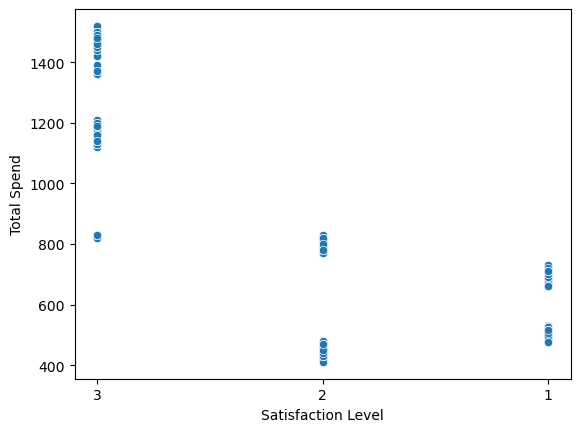

In [90]:
#Correlation between Satisfaction Level and Total Spend
satisfaction_df = pd.read_sql("SELECT \"Satisfaction Level\", \"Total Spend\" FROM ecommerce_customers", engine)
import seaborn as sns
sns.scatterplot(x='Satisfaction Level', y='Total Spend', data=satisfaction_df)

In [92]:
import sqlite3
conn = sqlite3.connect('ecommerce.db')

# List all tables
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
for table in tables:
    print(table)

('ecommerce_customers',)


In [97]:
import os
all_files = os.listdir()
db_file = [f for f in all_files if f.endswith('.db')]
print("Found DB file:", db_file)

Found DB file: ['ecommerce.db']


In [98]:
db_path = os.path.abspath("ecommerce.db")
print("Full path to your SQLite DB:", db_path)

Full path to your SQLite DB: C:\Users\ACER\Downloads\ecommerce.db
